In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
X_train = pd.read_csv('Xtrain_tvshows_featured.csv')
X_test = pd.read_csv('Xtest_tvshows_featured.csv')
y_train = pd.read_csv('ytrain_tvshows.csv')
y_test = pd.read_csv('ytest_tvshows.csv')
print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
print("Shape of y Train: {}".format(y_train.shape))
print("Shape of y Test: {}".format(y_test.shape))

Shape of X Train: (4294, 7)
Shape of X Test: (1074, 7)
Shape of y Train: (4294, 1)
Shape of y Test: (1074, 1)


In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

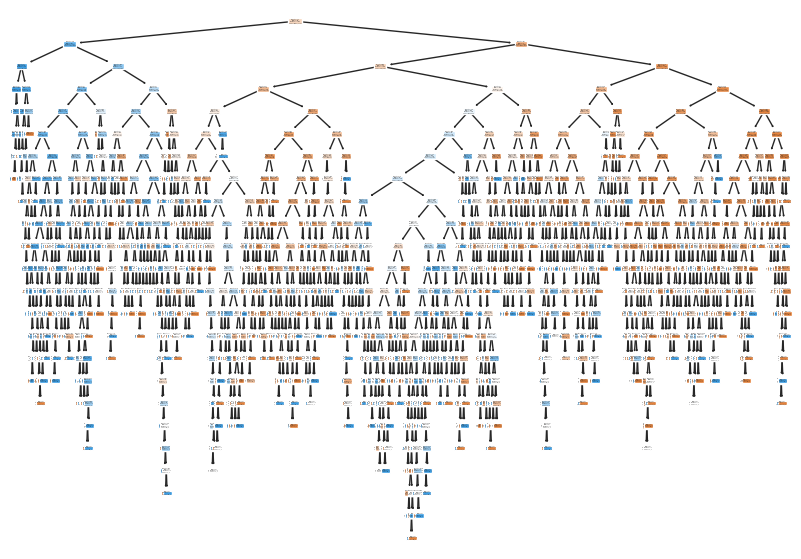

In [4]:
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(clf, filled = True)
plt.show()

In [5]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [6]:
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[2572    1]
 [  34 1687]]


In [7]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_test)

[[499 169]
 [123 283]]


In [8]:
print("Accuracy Score for the training set: {}".format(metrics.accuracy_score(y_train, y_pred_train)))
print("Accuracy Score for the test set: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

Accuracy Score for the training set: 0.9918490917559385
Accuracy Score for the test set: 0.7281191806331471


## Recall Score

In [9]:
print("Recall from training set: {}".format(metrics.recall_score(y_train,y_pred_train)))
print("Recall from test set: {}".format(metrics.recall_score(y_test,y_pred_test)))

Recall from training set: 0.9802440441603719
Recall from test set: 0.6970443349753694


## Precision Score

In [10]:
print("Precision score from training set: {}".format(metrics.precision_score(y_train,y_pred_train)))
print("Precision score from test set: {}".format(metrics.precision_score(y_test,y_pred_test)))

Precision score from training set: 0.9994075829383886
Precision score from test set: 0.6261061946902655



### F1-Score

In [11]:
print("Precision score from training set: {}".format(metrics.precision_score(y_train,y_pred_train)))
print("Precision score from test set: {}".format(metrics.precision_score(y_test,y_pred_test)))

Precision score from training set: 0.9994075829383886
Precision score from test set: 0.6261061946902655


## AUC Score

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train)
print("AUC score for the training set: {}".format(metrics.auc(fpr, tpr)))

AUC score for the training set: 0.9899276963903297


In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_test)
print("AUC score for the test set: {}".format(metrics.auc(fpr,tpr)))

AUC score for the test set: 0.7220251614996608


## Variable Importance

In [14]:
feat_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sorted_idx = np.argsort(feat_imp)
feat_imp_df = pd.DataFrame({'vars': X_train.columns[sorted_idx], 'feat_imp': clf.feature_importances_})
feat_imp_df.head()

,vars,feat_imp
0,Disney+,0.154096
1,Prime Video,0.204092
2,Hulu,0.568877
3,Netflix,0.018988
4,Rotten_Tomatoes,0.020067


In [15]:
feat_imp_df.shape

(7, 2)

In [ ]:
fig = px.bar(feat_imp_df, x= 'feat_imp', y='vars')
fig.update_yaxes(title_text='Variables')
fig.update_xaxes(title_text='Feature Importance')
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

In [17]:
fig = px.bar(feat_imp_df.iloc[:10,], x= 'feat_imp', y='vars')
fig.update_yaxes(title_text='Variables')
fig.update_xaxes(title_text='Feature Importance')
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()